# Polynomial Function Approximation via Taylor Series

## Theoretical Approach
The **Taylor Series** is a representation of a function as an infinite sum of terms that are calculated from the values of the function's derivatives at a single point. The core idea is that if we know everything about a function at a specific point $x_0$, we can reconstruct the function everywhere else.

The formula for the Taylor Polynomial of degree $N$ centered at $x_0$ is:

$$
P_N(x) = \sum_{n=0}^{N} \frac{f^{(n)}(x_0)}{n!} (x - x_0)^n
$$

Where:
* $f^{(n)}(x_0)$ is the $n$-th derivative of the function evaluated at the center $x_0$.
* $(x - x_0)^n$ shifts the polynomial to be centered at $x_0$.

## Mathematical Formulation
This program constructs the approximation term by term. The logic is based on **matching derivatives**:

*   Degree 0 ($n=0$): We set the constant term so that $P(x_0) = f(x_0)$. The approximation intersects the function.
*   Degree 1 ($n=1$): We add a linear term so that $P'(x_0) = f'(x_0)$. The approximation now has the same slope.
*   Degree 2 ($n=2$): We add a quadratic term so that $P''(x_0) = f''(x_0)$. The approximation now has the same concavity.

As we increase $N$, we match higher-order behaviors, causing the polynomial to adhere to the target function for a longer interval around $x_0$.



## Perfect Reconstruction of Polynomials

For **Transcendental Functions**, the series is infinite. We can only approximate them with a finite computer program.

However, for **Polynomial Functions**, the Taylor Series is finite and exact.
* If you differentiate a polynomial of degree $k$, the degree drops by 1 each time.
* The $(k+1)$-th derivative is exactly 0.
* Consequently, all Taylor terms for $n > k$ are zero.

Example:
For a cubic function ($x^3$), the 4th derivative is 0.

$$\frac{d}{dx}(x^3) \to 3x^2 \to 6x \to 6 \to 0$$

Therefore, the program will automatically stop adding terms once it detects the derivative has vanished, resulting in a perfectly accurate algebraic reconstruction of the original polynomial.

### Libraries Import

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

### User Configuration

In [46]:
# Variable symbol
x = sp.Symbol("x")
# Target function
target_function = sp.sin(x)
# Point of expansion
x0 = 1.0
# Maximum degree
max_degree = 12
# Range
x_limit = [-6,6]

print(f"Approximating function: {target_function}")
print(f"Centered at: {x0}")

Approximating function: sin(x)
Centered at: 1.0


### Calculating Function Approximation

In [47]:
# Initializing variables
taylor_polynomial = 0
approximation_steps = []
stopped_early = False

for n in range(max_degree + 1):
    # Calculating the derivatives
    derivative = sp.diff(target_function, x, n)

    # Evaluating the derivative at x0
    derivative_at_x0 = derivative.subs(x, x0)

    # Logic for stopping early
    if derivative == 0:
        stopped_early = True
        break

    # Building the term
    term = (derivative_at_x0 / sp.factorial(n)) * (x - x0)**n

    # Updating the cumulative sum
    taylor_polynomial += term

    # Storing approximation steps
    if derivative_at_x0 != 0:
        approximation_steps.append((n, taylor_polynomial))

### Plotting Function Approximation

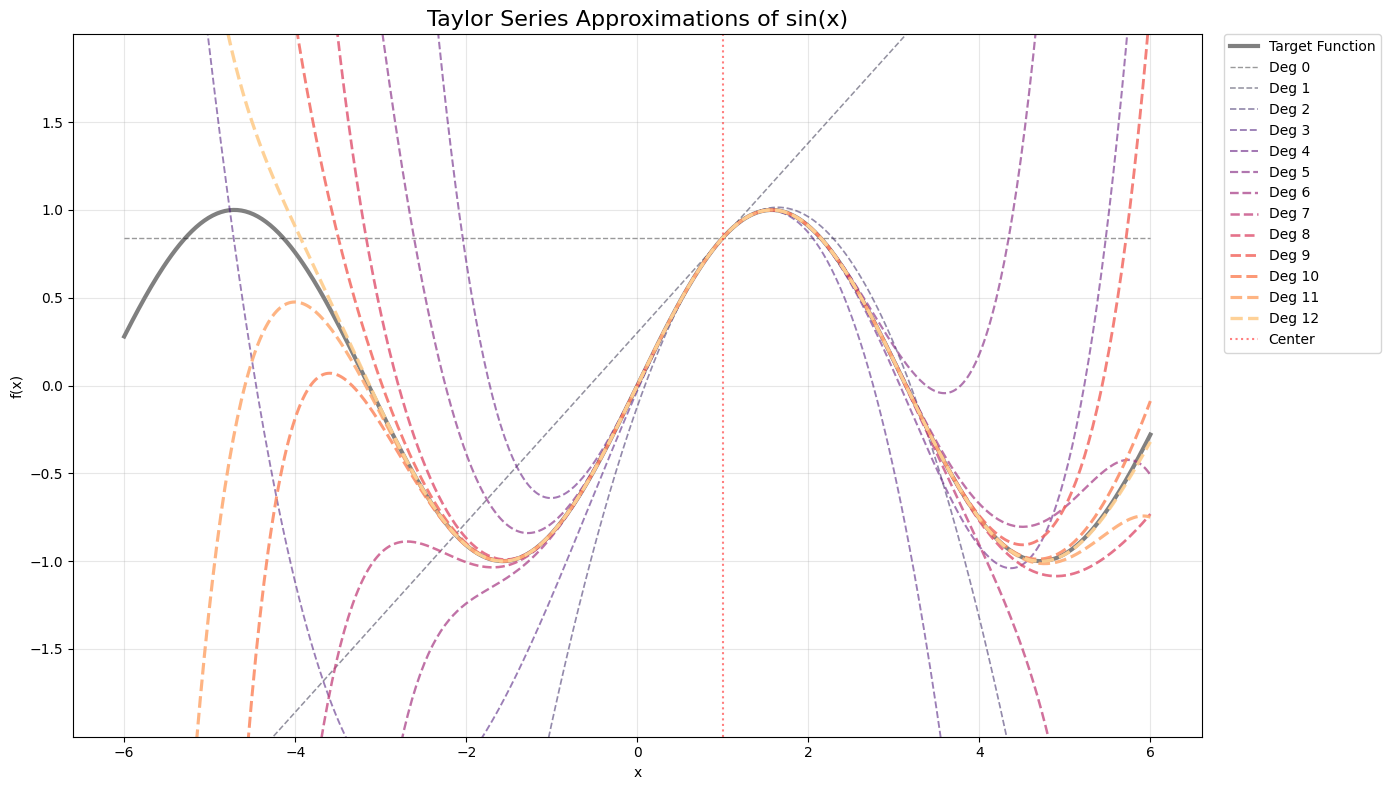

In [48]:
# Data Setup
x_vals = np.linspace(x_limit[0], x_limit[1], 500)
f_exact_numeric = sp.lambdify(x, target_function, modules=["numpy"])
y_exact = f_exact_numeric(x_vals)

# Fix for array issue
if np.ndim(y_exact) == 0:
    y_exact = np.full_like(x_vals, y_exact)

# Plot Setup
plt.figure(figsize=(14, 8))
plt.plot(x_vals, y_exact, color="grey", linewidth=3, label="Target Function")
colors = plt.cm.magma(np.linspace(0, 0.9, len(approximation_steps)))

for i, (degree, poly_expr) in enumerate(approximation_steps):
    # Creating runnable functions
    f_poly_numeric = sp.lambdify(x, poly_expr, modules=["numpy"])
    y_poly = f_poly_numeric(x_vals)
    if np.ndim(y_poly) == 0:
        y_poly = np.full_like(x_vals, y_poly)

    alpha_val = 0.4 + (0.6 * (i / len(approximation_steps)))
    width_val = 1.0 + (1.5 * (i / len(approximation_steps)))

    plt.plot(x_vals, y_poly, color=colors[i], linestyle="--",
             alpha=alpha_val, linewidth=width_val, label=f"Deg {degree}")

# Formatting
y_range = np.max(y_exact) - np.min(y_exact)
if y_range == 0: y_range = 1
plt.ylim(np.min(y_exact) - y_range*0.5, np.max(y_exact) + y_range*0.5)

plt.axvline(x0, color="red", linestyle=":", alpha=0.5, label="Center")
plt.title(f"Taylor Series Approximations of {target_function}", fontsize=16)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0.)

plt.tight_layout()
plt.show()